# Notebook associated to Arxiv.2504.08891

In [13]:
from collections import namedtuple
import scipy
from tqdm import tqdm
import os
import stim
import sinter
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Parameters, minimize, report_fit, report_ci, conf_interval, Minimizer, fit_report
from IPython.display import clear_output
import matplotlib.ticker as mticker
from Coordinates import Coord, SPLIT_DIST
from noise_v2 import NoiseModel, Probas
from fitting import *
from estim_seuil_telemesure import *

## Circuit level simulations of Distribituted rotated surface code



 ### Regular rotated surface code simulation and fit

Probas namedtuple is of the form ['onequbitgate', 'idle_data', 'idle_bell', 'twoqubitgate', 'prep', 'mes', 'bell'] it applies a coefficient in front of each p
 
for example: Probas(1, 1, 1, 1, 1, 1, 1) applies noise of parameter p to every operations

This data file already exist


Outer loop: 100%|██████████| 16/16 [00:43<00:00,  2.74s/it]
Starting 8 workers...


     shots,    errors,  discards, seconds,decoder,strong_id,json_metadata,custom_counts
p_l=9.566667e-05,	d=3,	k=9,	p=0.0001
p_l=7.990000e-04,	d=3,	k=9,	p=0.0003
p_l=2.333333e-06,	d=5,	k=15,	p=0.0001
p_l=6.233333e-05,	d=5,	k=15,	p=0.0003
p_l=0.000000e+00,	d=7,	k=21,	p=0.0001
p_l=0.000000e+00,	d=9,	k=27,	p=0.0001
p_l=2.000000e-06,	d=7,	k=21,	p=0.0003
p_l=0.000000e+00,	d=11,	k=33,	p=0.0001
p_l=0.000000e+00,	d=9,	k=27,	p=0.0003
p_l=0.000000e+00,	d=11,	k=33,	p=0.0003
p_l=2.171318e-03,	d=3,	k=9,	p=0.0005
p_l=2.496667e-04,	d=5,	k=15,	p=0.0005
p_l=2.500000e-05,	d=7,	k=21,	p=0.0005
p_l=1.333333e-06,	d=9,	k=27,	p=0.0005
p_l=3.333333e-07,	d=11,	k=33,	p=0.0005
p_l=3.140222e-03,	d=3,	k=9,	p=0.0006
p_l=4.396667e-04,	d=5,	k=15,	p=0.0006
p_l=4.766667e-05,	d=7,	k=21,	p=0.0006
p_l=4.666667e-06,	d=9,	k=27,	p=0.0006
p_l=1.000000e-06,	d=11,	k=33,	p=0.0006
p_l=4.251859e-03,	d=3,	k=9,	p=0.0007
p_l=6.746667e-04,	d=5,	k=15,	p=0.0007
p_l=9.033333e-05,	d=7,	k=21,	p=0.0007
p_l=1.433333e-05,	d=9,	k=27,	p=0.0007
p

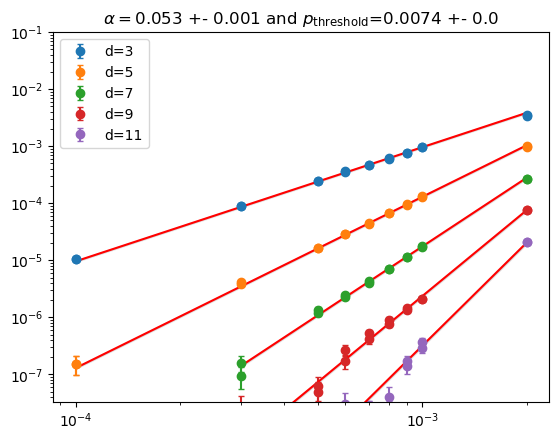

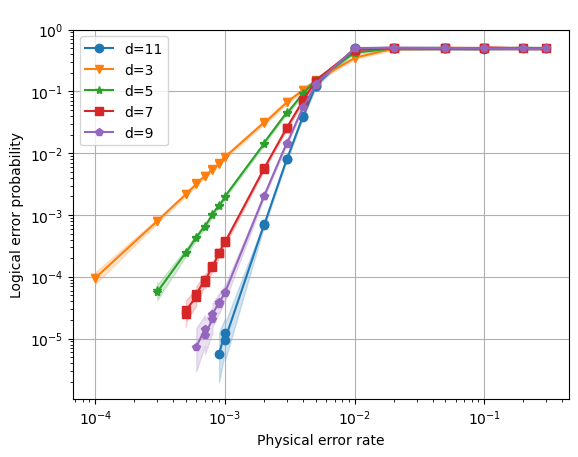

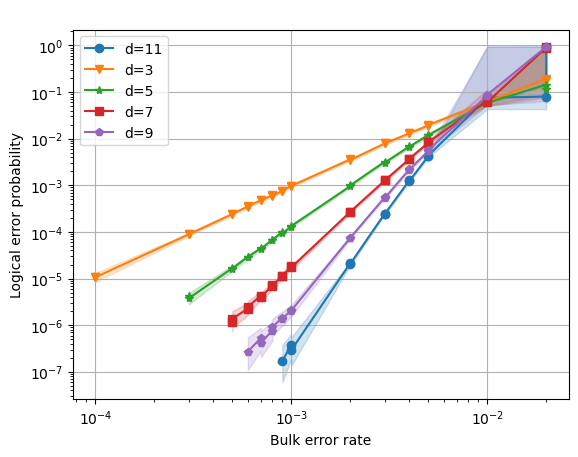

In [14]:
surface_code_threshold(kind='z', rep=lambda x: 3*x,
                        probas=Probas(1, 1, 1, 1, 1, 1, 1), filtered=True,
                        read_file='data_simu/regular_surface_code.csv')

Test with a noise model closer to SI 1000.

This data file already exist


Outer loop: 100%|██████████| 16/16 [00:44<00:00,  2.77s/it]
Starting 8 workers...


     shots,    errors,  discards, seconds,decoder,strong_id,json_metadata,custom_counts
p_l=2.866667e-05,	d=3,	k=9,	p=0.0001
p_l=1.333333e-06,	d=5,	k=15,	p=0.0001
p_l=0.000000e+00,	d=7,	k=21,	p=0.0001
p_l=0.000000e+00,	d=9,	k=27,	p=0.0001
p_l=0.000000e+00,	d=11,	k=33,	p=0.0001
p_l=3.080000e-04,	d=3,	k=9,	p=0.0003
p_l=1.700000e-05,	d=5,	k=15,	p=0.0003
p_l=3.333333e-07,	d=7,	k=21,	p=0.0003
p_l=0.000000e+00,	d=9,	k=27,	p=0.0003
p_l=0.000000e+00,	d=11,	k=33,	p=0.0003
p_l=8.366667e-04,	d=3,	k=9,	p=0.0005
p_l=6.900000e-05,	d=5,	k=15,	p=0.0005
p_l=6.000000e-06,	d=7,	k=21,	p=0.0005
p_l=0.000000e+00,	d=9,	k=27,	p=0.0005
p_l=0.000000e+00,	d=11,	k=33,	p=0.0005
p_l=1.169411e-03,	d=3,	k=9,	p=0.0006
p_l=1.180000e-04,	d=5,	k=15,	p=0.0006
p_l=7.666667e-06,	d=7,	k=21,	p=0.0006
p_l=6.666667e-07,	d=9,	k=27,	p=0.0006
p_l=3.333333e-07,	d=11,	k=33,	p=0.0006
p_l=1.673852e-03,	d=3,	k=9,	p=0.0007
p_l=1.893333e-04,	d=5,	k=15,	p=0.0007
p_l=2.200000e-05,	d=7,	k=21,	p=0.0007
p_l=2.333333e-06,	d=9,	k=27,	p=0.0007
p

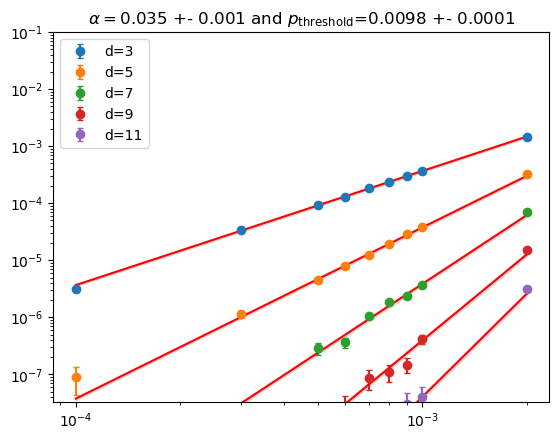

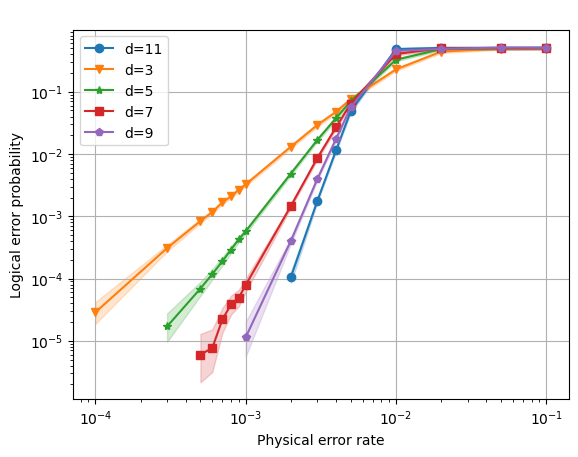

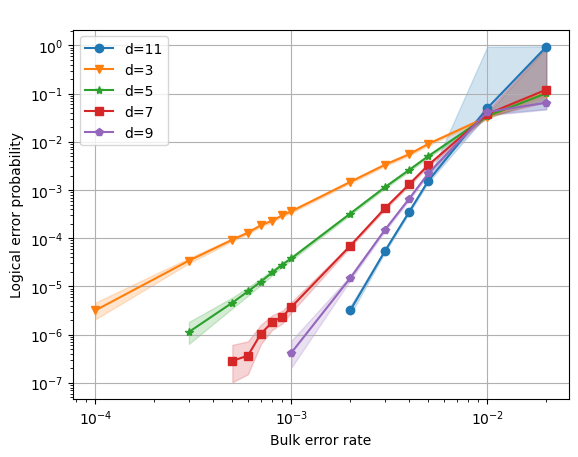

In [15]:
 
surface_code_threshold(kind='z', rep=lambda x: 3*x,
                        probas=Probas(1/10, 1/10, 1/10, 1, 2, 5, 1), filtered=True,
                        read_file='data_simu/regular_surface_code_SI1000.csv')


## Distributed rotated surface code with naive splitting 

(one vertical line of teleported mesurements, FIG.6)

This data file already exist


Outer loop: 100%|██████████| 15/15 [00:44<00:00,  2.93s/it]
Starting 8 workers...


     shots,    errors,  discards, seconds,decoder,strong_id,json_metadata,custom_counts
p_l=4.803869e-03,	d=3,	k=9,	p=0.0,	p_bell=0.001
p_l=6.889061e-03,	d=3,	k=9,	p=0.0,	p_bell=0.0013894954943731376
p_l=8.800000e-05,	d=5,	k=15,	p=0.0,	p_bell=0.0013894954943731376
p_l=4.300000e-05,	d=5,	k=15,	p=0.0,	p_bell=0.001
p_l=1.200000e-05,	d=7,	k=21,	p=0.0,	p_bell=0.001
p_l=3.066667e-05,	d=7,	k=21,	p=0.0,	p_bell=0.0013894954943731376
p_l=0.000000e+00,	d=9,	k=27,	p=0.0,	p_bell=0.001
p_l=0.000000e+00,	d=11,	k=33,	p=0.0,	p_bell=0.001
p_l=3.333333e-07,	d=9,	k=27,	p=0.0,	p_bell=0.0013894954943731376
p_l=3.333333e-07,	d=11,	k=33,	p=0.0,	p_bell=0.0013894954943731376
p_l=9.200774e-03,	d=3,	k=9,	p=0.0,	p_bell=0.0019306977288832496
p_l=1.723333e-04,	d=5,	k=15,	p=0.0,	p_bell=0.0019306977288832496
p_l=5.900000e-05,	d=7,	k=21,	p=0.0,	p_bell=0.0019306977288832496
p_l=1.333333e-06,	d=9,	k=27,	p=0.0,	p_bell=0.0019306977288832496
p_l=3.333333e-07,	d=11,	k=33,	p=0.0,	p_bell=0.0019306977288832496
p_l=1.303577e-02,

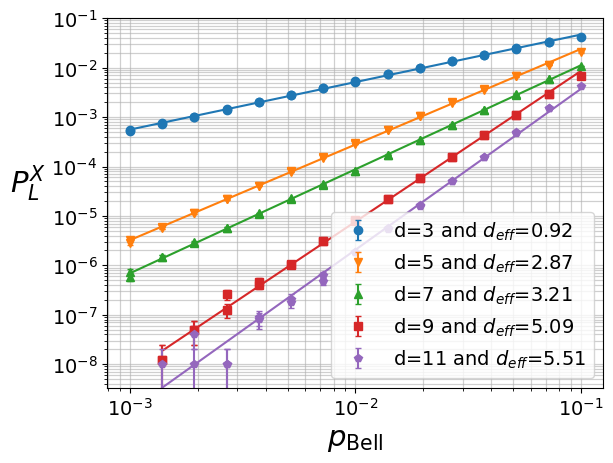

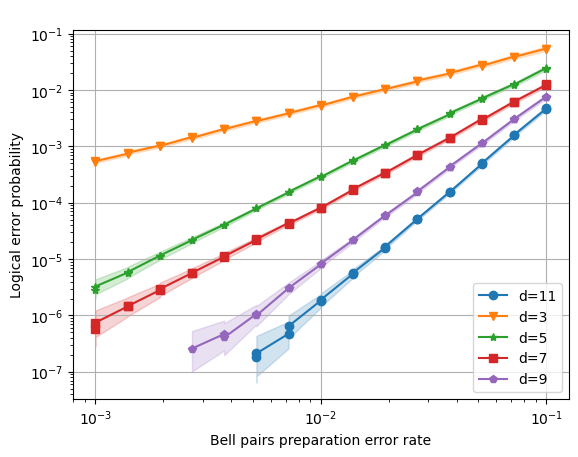

In [16]:
surface_code_pseudotreshold(kind='z', data_type='naive split p fixed', version=1, p_fixed=0e-3,
                           read_file='data_simu/naive_seam_halved_d.csv')

## Distributed Surface code with zig-zag seam 

With Bell pair noise fixed

This data file already exist


Outer loop: 100%|██████████| 13/13 [00:39<00:00,  3.03s/it]
Starting 8 workers...


     shots,    errors,  discards, seconds,decoder,strong_id,json_metadata,custom_counts
p_l=2.316667e-04,	d=5,	k=15,	p=0.0001,	p_bell=0.01
p_l=3.589519e-03,	d=3,	k=9,	p=0.0001,	p_bell=0.01
p_l=6.006667e-04,	d=5,	k=15,	p=0.0003,	p_bell=0.01
p_l=5.366667e-05,	d=7,	k=21,	p=0.0003,	p_bell=0.01
p_l=5.999892e-03,	d=3,	k=9,	p=0.0003,	p_bell=0.01
p_l=1.200000e-05,	d=7,	k=21,	p=0.0001,	p_bell=0.01
p_l=6.666667e-07,	d=9,	k=27,	p=0.0001,	p_bell=0.01
p_l=0.000000e+00,	d=11,	k=33,	p=0.0001,	p_bell=0.01
p_l=4.333333e-06,	d=9,	k=27,	p=0.0003,	p_bell=0.01
p_l=0.000000e+00,	d=11,	k=33,	p=0.0003,	p_bell=0.01
p_l=9.535425e-03,	d=3,	k=9,	p=0.0005,	p_bell=0.01
p_l=1.295455e-03,	d=5,	k=15,	p=0.0005,	p_bell=0.01
p_l=1.416667e-04,	d=7,	k=21,	p=0.0005,	p_bell=0.01
p_l=2.066667e-05,	d=9,	k=27,	p=0.0005,	p_bell=0.01
p_l=1.666667e-06,	d=11,	k=33,	p=0.0005,	p_bell=0.01
p_l=2.162151e-02,	d=3,	k=9,	p=0.001,	p_bell=0.01
p_l=5.105017e-03,	d=5,	k=15,	p=0.001,	p_bell=0.01
p_l=1.098294e-03,	d=7,	k=21,	p=0.001,	p_bell=0.0

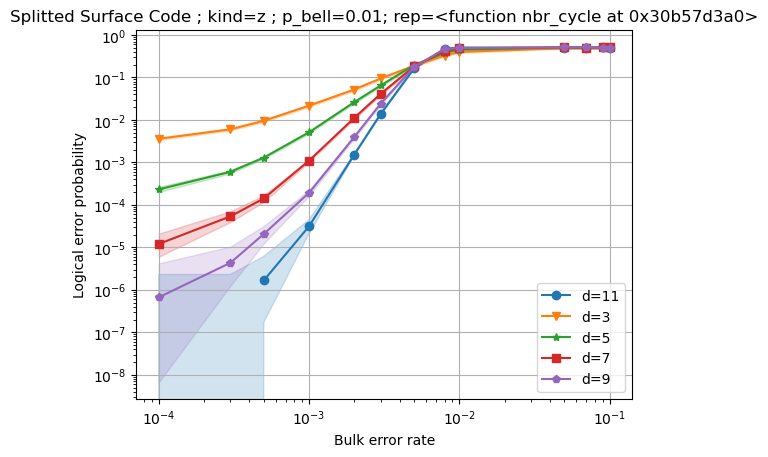

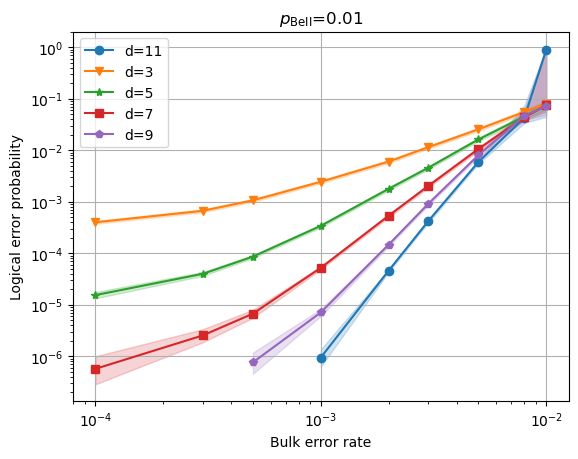

In [19]:
surface_code_pseudotreshold(kind='z', data_type='p_bell fixed',
                           version=2, p_bell_fixed=0.01,
                           read_file='data_simu/one_seam_pbell0.01.csv')


Sanity check that Z distance is not affected :

This data file already exist


Outer loop: 100%|██████████| 13/13 [00:41<00:00,  3.20s/it]
Starting 8 workers...


     shots,    errors,  discards, seconds,decoder,strong_id,json_metadata,custom_counts
p_l=1.276667e-04,	d=3,	k=9,	p=0.0001,	p_bell=0.0
p_l=1.105383e-03,	d=3,	k=9,	p=0.0003,	p_bell=0.0
p_l=7.266667e-05,	d=5,	k=15,	p=0.0003,	p_bell=0.0
p_l=1.666667e-06,	d=5,	k=15,	p=0.0001,	p_bell=0.0
p_l=0.000000e+00,	d=7,	k=21,	p=0.0001,	p_bell=0.0
p_l=1.333333e-06,	d=7,	k=21,	p=0.0003,	p_bell=0.0
p_l=0.000000e+00,	d=9,	k=27,	p=0.0001,	p_bell=0.0
p_l=0.000000e+00,	d=11,	k=33,	p=0.0001,	p_bell=0.0
p_l=3.333333e-07,	d=9,	k=27,	p=0.0003,	p_bell=0.0
p_l=0.000000e+00,	d=11,	k=33,	p=0.0003,	p_bell=0.0
p_l=3.072140e-03,	d=3,	k=9,	p=0.0005,	p_bell=0.0
p_l=3.356667e-04,	d=5,	k=15,	p=0.0005,	p_bell=0.0
p_l=3.266667e-05,	d=7,	k=21,	p=0.0005,	p_bell=0.0
p_l=3.000000e-06,	d=9,	k=27,	p=0.0005,	p_bell=0.0
p_l=0.000000e+00,	d=11,	k=33,	p=0.0005,	p_bell=0.0
p_l=1.185619e-02,	d=3,	k=9,	p=0.001,	p_bell=0.0
p_l=2.601529e-03,	d=5,	k=15,	p=0.001,	p_bell=0.0
p_l=4.876667e-04,	d=7,	k=21,	p=0.001,	p_bell=0.0
p_l=8.000000e-05

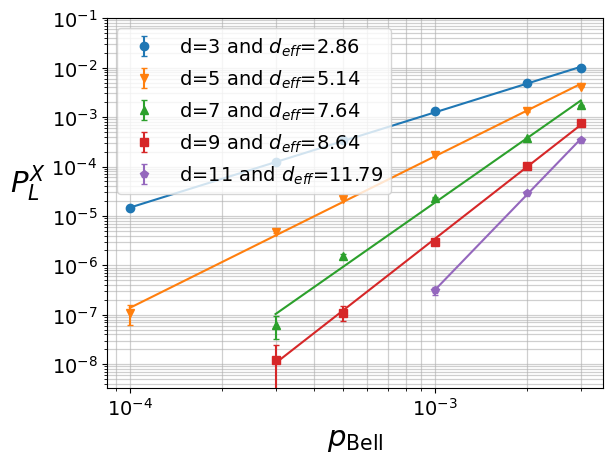

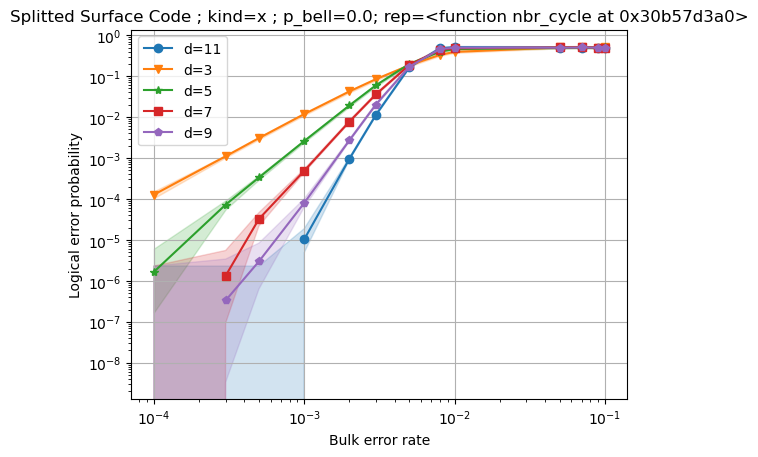

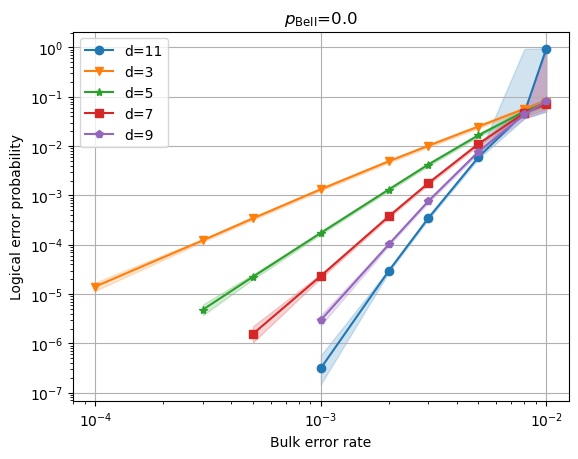

In [20]:
surface_code_pseudotreshold(kind='x', data_type='p_bell fixed', version=2, p_bell_fixed=0e-2, fits=[
          'slopes'],
          read_file='data_simu/one_seam_d=3-11_x_state_p_bell_fixed.csv')

# Distributed surface code with fit over a set of $(p_{bell},p)$ values

Naive ansatz $P_L^X= \alpha_1 \left(\frac{p}{p_{\text{bth}}}\right)^{\frac{d+1}{2}}+ \alpha_2 \left(\frac{p_{bell}}{p_{\text{sth}}}\right)^{\frac{d+1}{2}}$
Where s and b stands for seam and bulk respectively

Also display a slice at $p=10^{-3}$ to see how good the fit is in the regime of interest.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 539
    # variables        = 4
    chi-square         = 36400.3543
    reduced chi-square = 68.0380454
    Akaike info crit   = 2278.60122
    Bayesian info crit = 2295.76008
[[Variables]]
    alpha2:  0.07275476 +/- 0.00796161 (10.94%) (init = 0.5)
    alpha1:  0.19867149 +/- 0.02104286 (10.59%) (init = 0.5)
    pbth:    0.00687769 +/- 2.0542e-04 (2.99%) (init = 0.01)
    psth:    0.19716524 +/- 0.00469508 (2.38%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha2, pbth) = +0.9802
    C(alpha1, psth) = +0.9649
           99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 alpha2:  -0.02032  -0.01429  -0.00756   0.07275  +0.00853  +0.01820  +0.02926
 alpha1:  -0.05511  -0.03839  -0.02010   0.19867  +0.02217  +0.04674  +0.07411
 pbth  :  -0.00058  -0.00039  -0.00020   0.00688  +0.00021  +0.00044  +0.00068
 psth  :  -0.01345  -0.00909  -0.

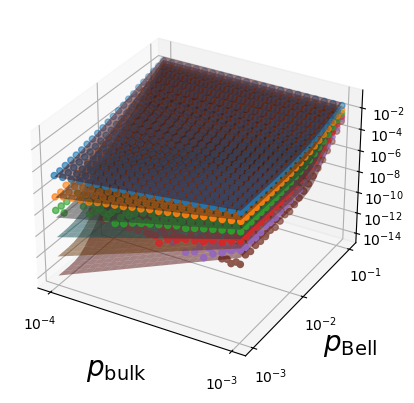

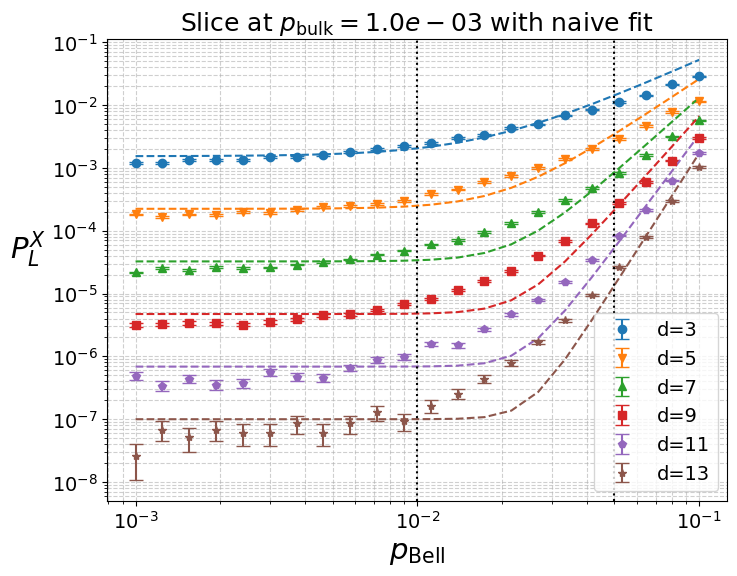

In [26]:
data_tofit, out, P_bulk, P_seam = full_fit_sample(
    1e-4, 1e-3, 1e-3, 1e-1, lattice_size=22,
    read_file='data_simu/sampling_3d_v15.csv',
    fit_interval=(5e-4, 1e-3, 0., 5e-2, 0.5),
    fit_3D_type=['naive'])


Fit with the full ansatz 
$$P_{L}^X \approx
    \alpha_1{\left(\frac{p_{\text{Bell}}}{p_{\text{sth}}}\right)}^{\frac{d+1}{2}} +  \alpha_2{\left(\frac{p}{p_{\text{bth}}}\right)}^{\frac{d+1}{2}}  
    + \alpha_3 \sum_{1\leq i\leq d}{\left(\frac{p_{\text{Bell}}}{p_{\text{sth}}}{\left(1+\frac{\alpha_c}{1-\sqrt{p/p_{\text{bth}}}}\right)}^{2}\right)}^{\frac{i}{2}} {\left( \frac{p}{p_{\text{bth}}}\right)}^{\frac{d+1-i}{2}}$$

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 129
    # data points      = 539
    # variables        = 6
    chi-square         = 1275.32979
    reduced chi-square = 2.39273883
    Akaike info crit   = 476.210794
    Bayesian info crit = 501.949087
[[Variables]]
    alphac:  0.20569810 +/- 0.01569759 (7.63%) (init = 0.5)
    alpha3:  0.05326164 +/- 0.00108159 (2.03%) (init = 0.5)
    alpha2:  0.04507387 +/- 0.00108335 (2.40%) (init = 0.5)
    alpha1:  0.09878947 +/- 0.01498501 (15.17%) (init = 0.5)
    pbth:    0.00715764 +/- 3.9341e-05 (0.55%) (init = 0.01)
    psth:    0.29834991 +/- 0.01011641 (3.39%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(alphac, psth)   = +0.9926
    C(alpha2, pbth)   = +0.8595
    C(alphac, alpha1) = +0.8179
    C(alpha1, psth)   = +0.8087
    C(alpha3, pbth)   = +0.6650
    C(alpha3, alpha1) = -0.4435
    C(alpha3, alpha2) = +0.2764
    C(alphac, alpha2) = +0.2561
    C(alpha2, psth)   = +0.2215


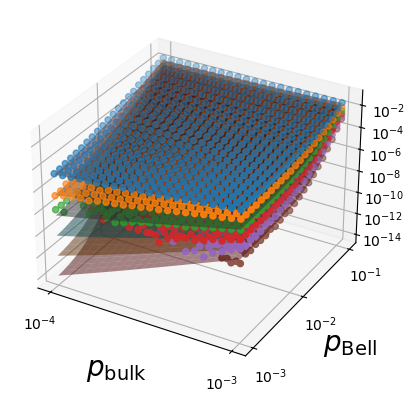

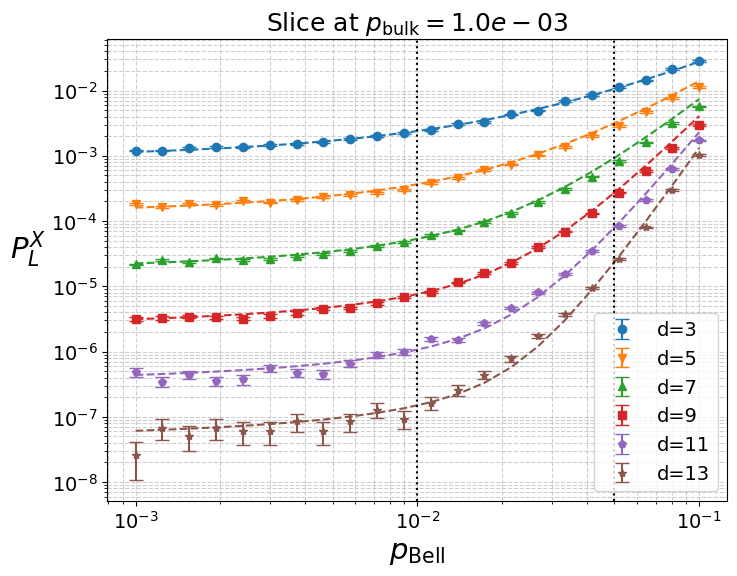

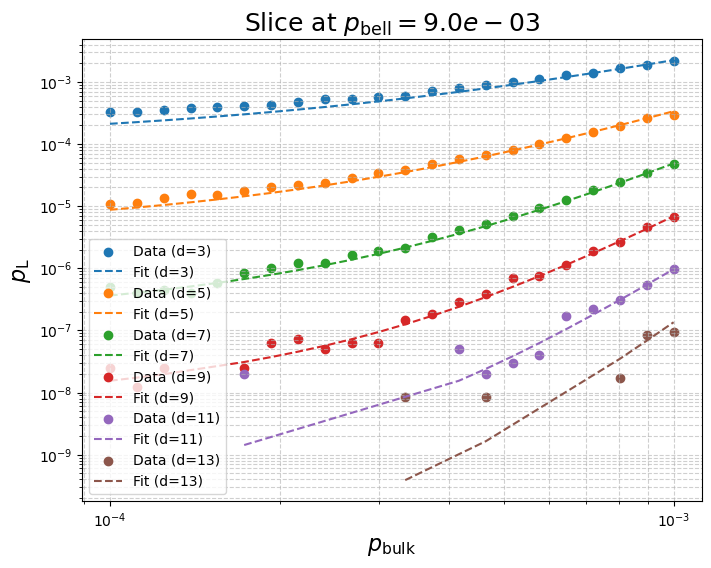

In [27]:
data_tofit, out, P_bulk, P_seam = full_fit_sample(
        1e-4, 1e-3, 1e-3, 1e-1, lattice_size=22,
        read_file='data_simu/sampling_3d_v15.csv',
        fit_interval=(5e-4, 1e-3, 0., 5e-2, 0.5),
        fit_3D_type=['full'])


# Case with two seam 

Simulation of a rectangular patch with two seam separated by $2d+1$ data qubits reproducing the seam spacing of the layout during lattice surgery.

$p=10^{-3}$ and dashed curves are the previous ansatz with the previous ftted parameter displayed on top of the simulation points. We see a good accordance of the model even in the multi seam setting.

Here the model is 
$$P_{L}^X \approx
    \alpha_1n_{\text{seam}}{\left(\frac{p_{\text{Bell}}}{p_{\text{sth}}}\right)}^{\frac{d+1}{2}} +  \alpha_2 \frac{\ell}{d}{\left(\frac{p}{p_{\text{bth}}}\right)}^{\frac{d+1}{2}}  
    + \alpha_3 n_{\text{seam}}\sum_{1\leq i\leq d}{\left(\frac{p_{\text{Bell}}}{p_{\text{sth}}}{\left(1+\frac{\alpha_c}{1-\sqrt{p/p_{\text{bth}}}}\right)}^{2}\right)}^{\frac{i}{2}} {\left( \frac{p}{p_{\text{bth}}}\right)}^{\frac{d+1-i}{2}}$$

    where $n_{\text{seam}}=2$ and $\ell=4d+3$ is the width of the rectangular patch

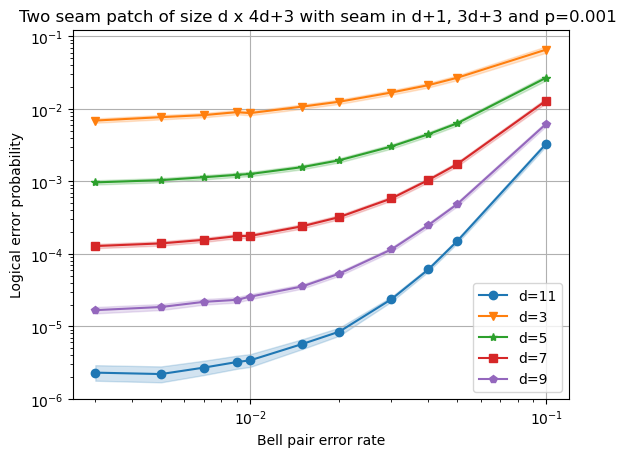

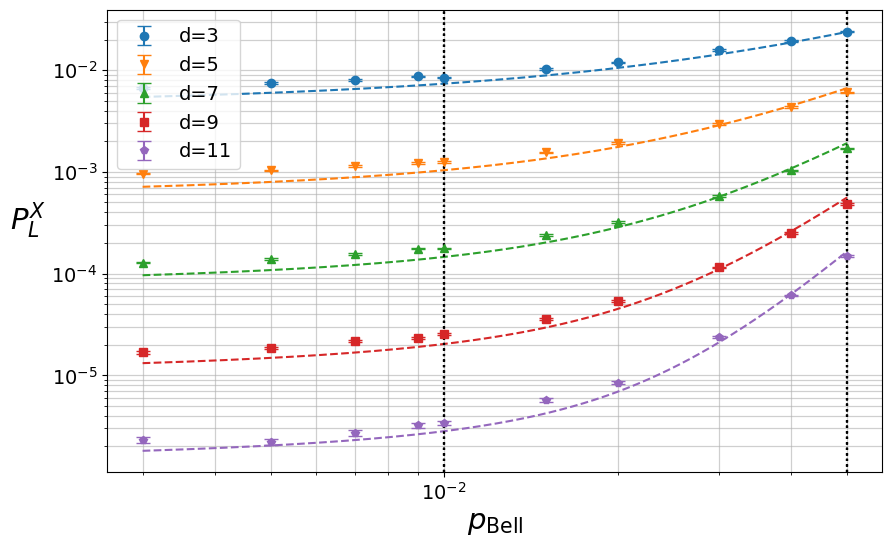

In [28]:

multiple_seam_surface_code_pseudothreshold(kind='z', p=1e-3,
                                            read_file='data_simu/simu_two_seam_4d+3_d_3d.csv',
                                            rep=nbr_cycle)